In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("playgolf_data.csv")
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [5]:
df.dtypes

Outlook        object
Temperature    object
Humidity       object
Wind           object
PlayGolf       object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayGolf     14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [7]:
df_dummies = pd.get_dummies(df,columns=['Outlook','Temperature','Humidity','Wind'])
df_dummies

,PlayGolf,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,No,False,False,True,False,True,False,True,False,False,True
1,No,False,False,True,False,True,False,True,False,True,False
2,Yes,True,False,False,False,True,False,True,False,False,True
3,Yes,False,True,False,False,False,True,True,False,False,True
4,Yes,False,True,False,True,False,False,False,True,False,True
5,No,False,True,False,True,False,False,False,True,True,False
6,Yes,True,False,False,True,False,False,False,True,True,False
7,No,False,False,True,False,False,True,True,False,False,True
8,Yes,False,False,True,True,False,False,False,True,False,True
9,Yes,False,True,False,False,False,True,False,True,False,True


In [9]:
from sklearn.model_selection import train_test_split as tts

In [58]:
x=df_dummies.drop('PlayGolf',axis=1)
y=df_dummies['PlayGolf']

In [31]:
x

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,False,False,True,False,True,False,True,False,False,True
1,False,False,True,False,True,False,True,False,True,False
2,True,False,False,False,True,False,True,False,False,True
3,False,True,False,False,False,True,True,False,False,True
4,False,True,False,True,False,False,False,True,False,True
5,False,True,False,True,False,False,False,True,True,False
6,True,False,False,True,False,False,False,True,True,False
7,False,False,True,False,False,True,True,False,False,True
8,False,False,True,True,False,False,False,True,False,True
9,False,True,False,False,False,True,False,True,False,True


In [32]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: PlayGolf, dtype: object

In [59]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.30,random_state=101)

In [60]:
from sklearn.tree import DecisionTreeClassifier as deci

In [61]:
decision = deci(criterion='entropy',max_depth=2)
decision.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [62]:
predicts = decision.predict(x_test)

In [63]:
from sklearn.tree import plot_tree

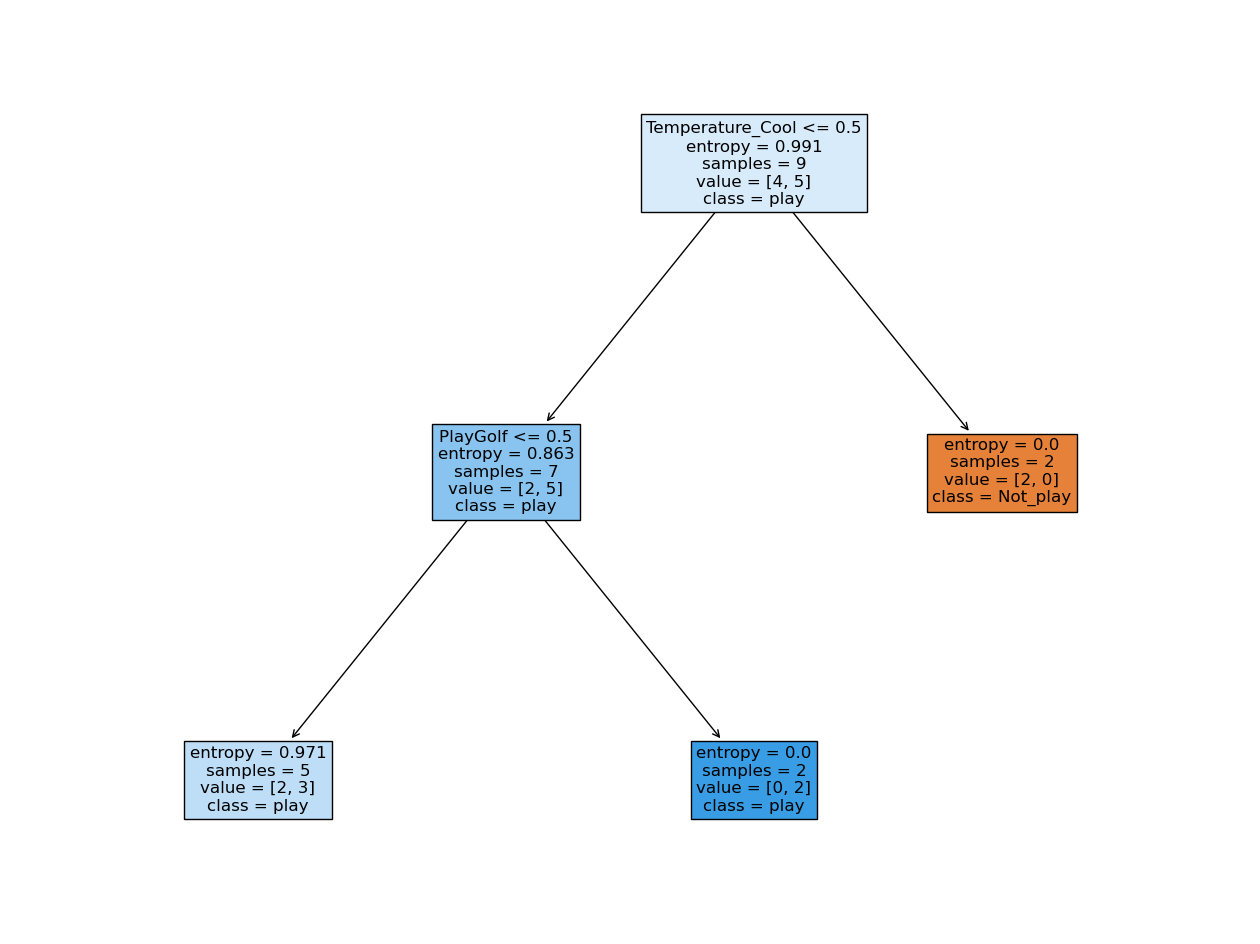

In [64]:
import matplotlib.pyplot as plt
flg = plt.figure(figsize=(16,12))
a = plot_tree(decision,feature_names=df_dummies.columns,fontsize=12,filled=True,class_names=['Not_play','play'])

In [65]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [66]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.67      0.50      0.57         4

    accuracy                           0.40         5
   macro avg       0.33      0.25      0.29         5
weighted avg       0.53      0.40      0.46         5

